# Test Sohyuce - Ronan Tardif

**Objectif du Test :** Identifier les principaux facteurs influençant la segmentation des clients mise en place dans un contexte marketing.

**Étapes du Test :**
1. **Analyse Exploratoire des Données :** Visualiser les tendances.
2. **Prétraitement des Données :** Gérer les valeurs manquantes, convertir les types de données.
3. **Etude des corrélations :** Visualiser les corrélations entre variables.
4. **Classification des Clients :** Utiliser des modèles de classification pour prédire le segment des clients.
5. **Analyse des Facteurs Contributifs :** Identifier les variables clés qui impactent la classification.
6. **Interprétation des Résultats :** Présenter des recommandations marketing basées sur les insights obtenus.

**Livrables :** Notebook + Note technique

## 0. Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Analyse exploratoire des données

### Importation des données

In [2]:
train_data = pd.read_csv("data/Train.csv", sep=",")
train_data = train_data.drop(columns=['Segmentation'])

test_data = pd.read_csv("data/Test.csv", sep=",")

In [3]:
train_data  

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


### Analyses graphiques

#### Analyse variable cible :  Des données très déséquilibrées

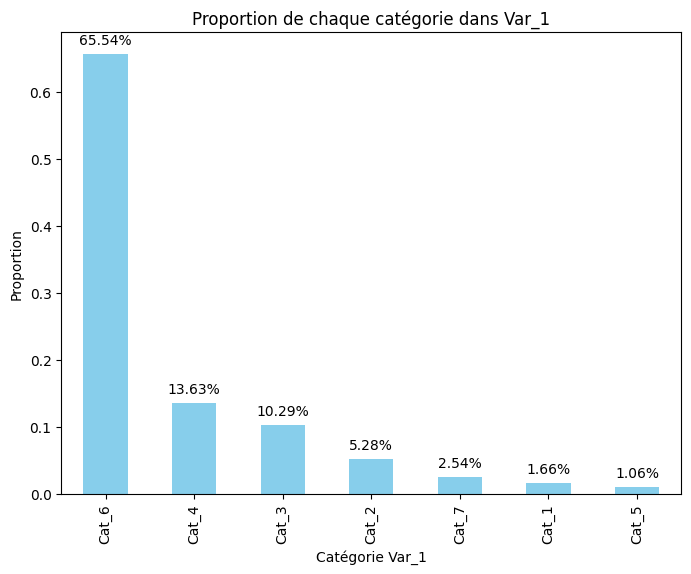

In [4]:
# Compter les occurrences de chaque catégorie dans 'Var_1'
var1_counts = train_data['Var_1'].value_counts()

# Calculer les proportions
var1_proportions = var1_counts / var1_counts.sum()

# Créer un diagramme en barres avec les pourcentages
plt.figure(figsize=(8, 6))
var1_proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion de chaque catégorie dans Var_1')
plt.xlabel('Catégorie Var_1')
plt.ylabel('Proportion')

# Ajouter les pourcentages au-dessus de chaque barre
for index, value in enumerate(var1_proportions):
    plt.text(index, value + 0.01, f'{value:.2%}', ha='center', va='bottom', fontsize=10)

plt.show()


- **Catégorie Dominante :** Cat_6 est la catégorie la plus fréquente, représentant environ 65.54% des observations.

- **Catégories Suivantes :** Cat_4 et Cat_3 sont les segments suivants avec respectivement 10.63% et et 10.29%.

- **Catégories Moins Fréquentes :** Cat_2, Cat_7, Cat_1, et Cat_5 ont des faibles fréquences, allant de 5.28% à 1.06%.


Le fort déséquilibre sera un point d'attention particulier pour ce travail. Il devra être traité pour ne pas trop biaiser les résultats. Plusieurs méthodes existent, ici on choisira qu'un seul modèle pour prédire les 7 classes et on y intégrera un preprocessing spécifique et des métriques appropriées.

#### Analyse des variables explicatives

In [5]:
def plot_stacked_bar(df, variable_name):
    # Vérifier le nombre de catégories dans la variable
    num_categories = len(df[variable_name].unique())
    
    # Calcul des pourcentages
    percentages = df.groupby(['Var_1', variable_name]).size() / df.groupby('Var_1').size() * 100
    percentages = percentages.unstack().fillna(0)

    # Normaliser les pourcentages pour que la somme soit égale à 100
    percentages = percentages.div(percentages.sum(axis=1), axis=0) * 100

    # Créer un graphique à barres empilées
    plt.figure(figsize=(10, 6))
    percentages.plot(kind='bar', stacked=True)

    plt.title(f'Distribution de Var_1 en fonction de {variable_name} (en %)')
    plt.xlabel('Var_1')
    plt.ylabel('Pourcentage')
    plt.legend(title=variable_name, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    return percentages

<Figure size 1000x600 with 0 Axes>

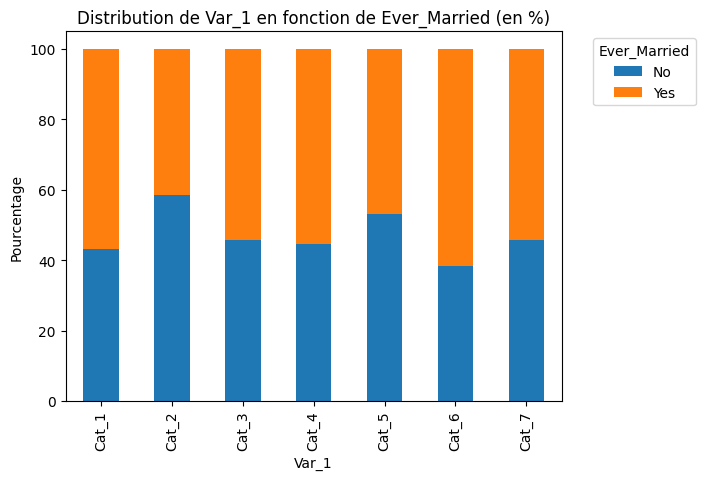

Ever_Married,No,Yes
Var_1,,
Cat_1,43.076923,56.923077
Cat_2,58.495146,41.504854
Cat_3,45.707071,54.292929
Cat_4,44.716981,55.283019
Cat_5,53.012048,46.987952
Cat_6,38.381302,61.618698
Cat_7,45.728643,54.271357


In [6]:
plot_stacked_bar(train_data, 'Ever_Married')

- La catégorie **Cat_6** se distingue par un pourcentage plus élevé de personnes s'étant déjà mariés, atteignant environ 61,62%.
- En revanche, la catégorie **Cat_1** présente un pourcentage légèrement plus bas, s'élevant à environ 56,92%.


<Figure size 1000x600 with 0 Axes>

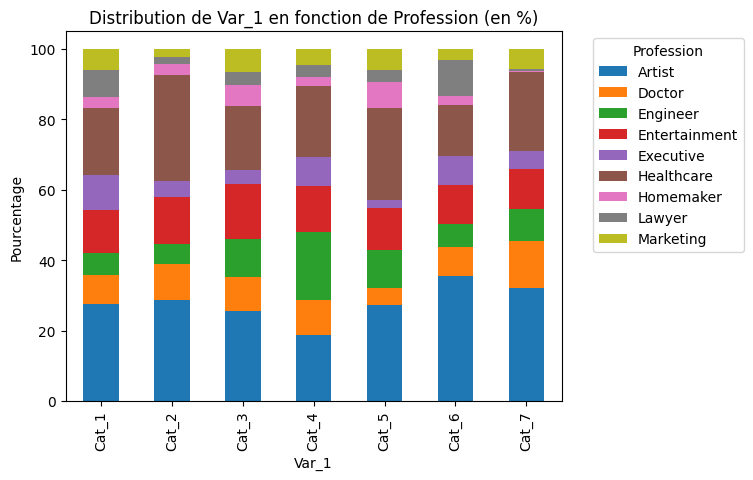

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Var_1,,,,,,,,,
Cat_1,27.480916,8.396947,6.106870,12.213740,9.923664,19.083969,3.053435,7.633588,6.106870
Cat_2,28.809524,10.238095,5.476190,13.333333,4.761905,30.000000,3.095238,1.904762,2.380952
Cat_3,25.497512,9.701493,10.945274,15.547264,3.980100,18.159204,5.970149,3.606965,6.592040
Cat_4,18.826868,9.933775,19.299905,12.961211,8.230842,20.151372,2.649007,3.405866,4.541154
Cat_5,27.380952,4.761905,10.714286,11.904762,2.380952,26.190476,7.142857,3.571429,5.952381
Cat_6,35.605329,8.032439,6.642209,11.141147,8.302761,14.307781,2.741842,10.233636,2.992856
Cat_7,32.142857,13.265306,9.183673,11.224490,5.102041,22.448980,0.510204,0.510204,5.612245


In [7]:
plot_stacked_bar(train_data, 'Profession')

- **Cat_6** a une proportion élevée d'individus travaillant dans la profession *Homemaker*.
- **Cat_3** a une forte représentation dans les professions *Engineer* et *Healthcare*.
- **Cat_2** semble avoir une proportion élevée de personnes travaillant dans la profession *Healthcare*.
- **Cat_7** a une représentation relativement faible dans toutes les professions, suggérant une diversité de professions au sein de cette catégorie.
- **Cat_5** semble avoir une forte proportion d'individus travaillant dans *Healthcare* et *Homemaker*.



<Figure size 1000x600 with 0 Axes>

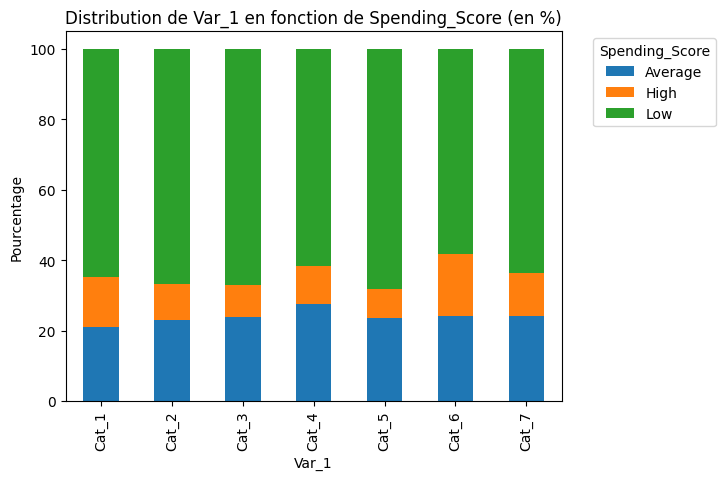

Spending_Score,Average,High,Low
Var_1,,,
Cat_1,21.052632,14.285714,64.661654
Cat_2,22.985782,10.189573,66.824645
Cat_3,23.965937,8.880779,67.153285
Cat_4,27.640037,10.651974,61.707989
Cat_5,23.529412,8.235294,68.235294
Cat_6,24.150439,17.621229,58.228331
Cat_7,24.137931,12.315271,63.546798


In [8]:
plot_stacked_bar(train_data, 'Spending_Score')

- Les catégories **Cat_1** et **Cat_6** se démarquent par une proportion significativement plus élevée d'individus ayant un score de dépenses *High*, indiquant une propension à des dépenses élevées par rapport aux autres catégories.
- Les catégorie **Cat_3** et **Cat_5** présente une proportion relativement plus élevée d'individus ayant un score de dépenses *Low*,  suggérant une propension à dépenser moins par rapport aux autres catégories
- Les catégories **Cat_2**, **Cat_4**, et **Cat_7** montrent des tendances plus équilibrées entre les scores de dépenses *Average*, *High*, et *Low*, indiquant une répartition relativement uniforme des habitudes de dépenses au sein de ces catégories.

<Figure size 1000x600 with 0 Axes>

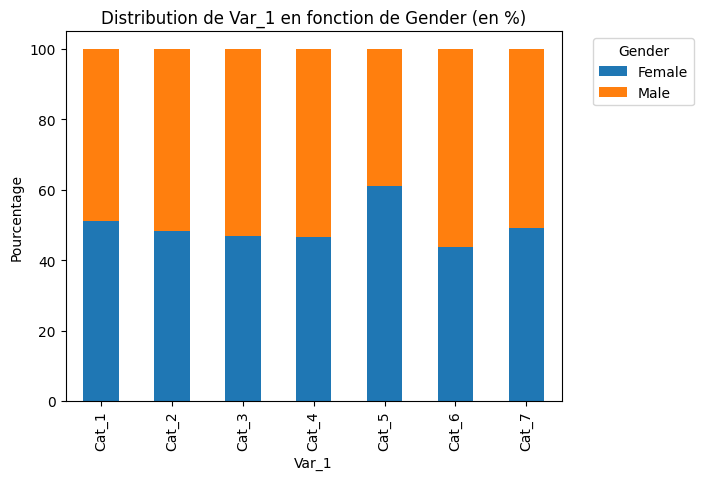

Gender,Female,Male
Var_1,,
Cat_1,51.127820,48.872180
Cat_2,48.341232,51.658768
Cat_3,46.958637,53.041363
Cat_4,46.648301,53.351699
Cat_5,61.176471,38.823529
Cat_6,43.757159,56.242841
Cat_7,49.261084,50.738916


In [9]:
plot_stacked_bar(train_data, 'Gender')


- Les catégories **Cat_5** et **Cat_3** se distinguent par une proportion significativement plus élevée de femmes.
- Les catégories **Cat_6** et **Cat_4** présentent une répartition plus équilibrée entre les genres, avec une légère prédominance pour les hommes.
- Les catégories **Cat_1**, **Cat_2**, et **Cat_7** affichent une répartition relativement équilibrée entre les genres, indiquant une diversité dans la composition de genre au sein de ces catégories.

In [10]:
def plot_boxplots(df, continuous_variable):
    # Créer des boxplots pour la variable continue en fonction de Var_1
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Var_1', y=continuous_variable, data=df, palette='viridis')
    
    plt.title(f'Boxplots de {continuous_variable} en fonction de Var_1')
    plt.xlabel('Var_1')
    plt.ylabel(continuous_variable)
    plt.show()
    
   # Table des résultats des boxplots
    boxplot_results = df.groupby('Var_1')[continuous_variable].describe()
    return boxplot_results

C:\Users\HP\AppData\Local\Temp\ipykernel_6768\3590687936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Var_1', y=continuous_variable, data=df, palette='viridis')


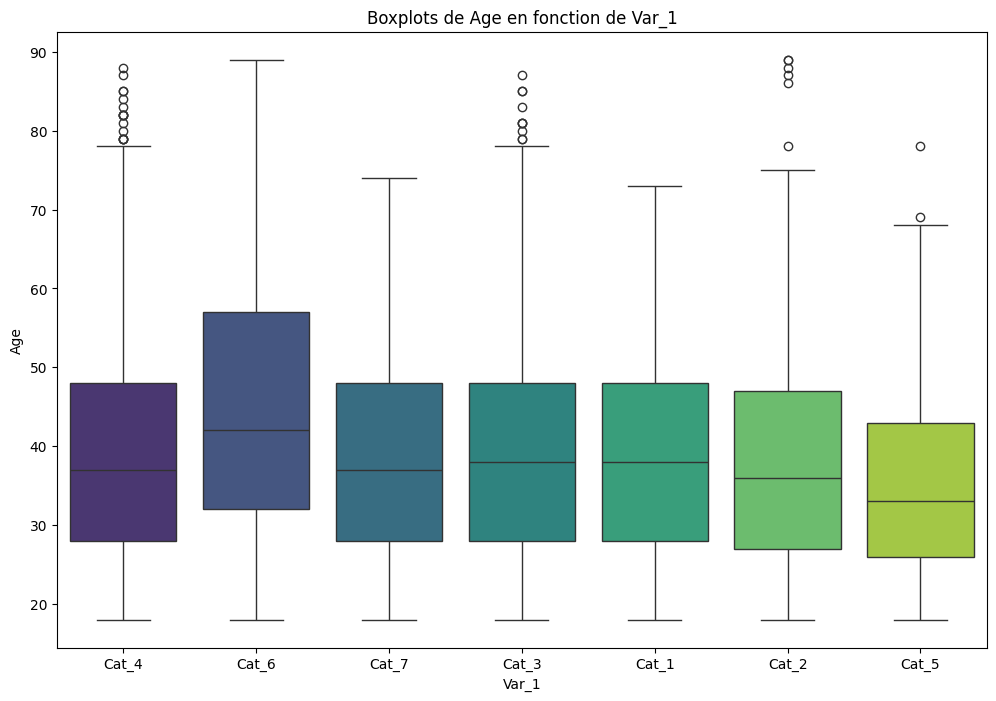

,count,mean,std,min,25%,50%,75%,max
Var_1,,,,,,,,
Cat_1,133.0,39.751880,14.904446,18.0,28.0,38.0,48.0,73.0
Cat_2,422.0,37.476303,13.982451,18.0,27.0,36.0,47.0,89.0
Cat_3,822.0,39.253041,14.056237,18.0,28.0,38.0,48.0,87.0
Cat_4,1089.0,39.108356,14.464244,18.0,28.0,37.0,48.0,88.0
Cat_5,85.0,37.164706,13.464987,18.0,26.0,33.0,43.0,78.0
Cat_6,5238.0,45.892707,17.414960,18.0,32.0,42.0,57.0,89.0
Cat_7,203.0,38.630542,12.811909,18.0,28.0,37.0,48.0,74.0


In [11]:
plot_boxplots(train_data, 'Age')

- **Cat_1**: Moyenne d'âge d'environ 39 ans, avec une variabilité modérée (écart-type de 14.9) et une distribution relativement équilibrée.
- **Cat_6**: Moyenne d'âge la plus élevée parmi toutes les catégories, avec environ 45 ans en moyenne, montrant une tendance à des âges plus élevés dans cette catégorie.
- **Cat_2, Cat_3, et Cat_4**: Moyennes d'âge assez proches, oscillant autour de 37 ans  à 39 ans, avec des distributions également équilibrées.
- **Cat_5**: Moyenne d'âge la plus basse parmi toutes les catégories, avec environ 37ans, suggérant une concentration de personnes plus jeunes dans cette catégorie.


C:\Users\HP\AppData\Local\Temp\ipykernel_6768\3590687936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Var_1', y=continuous_variable, data=df, palette='viridis')


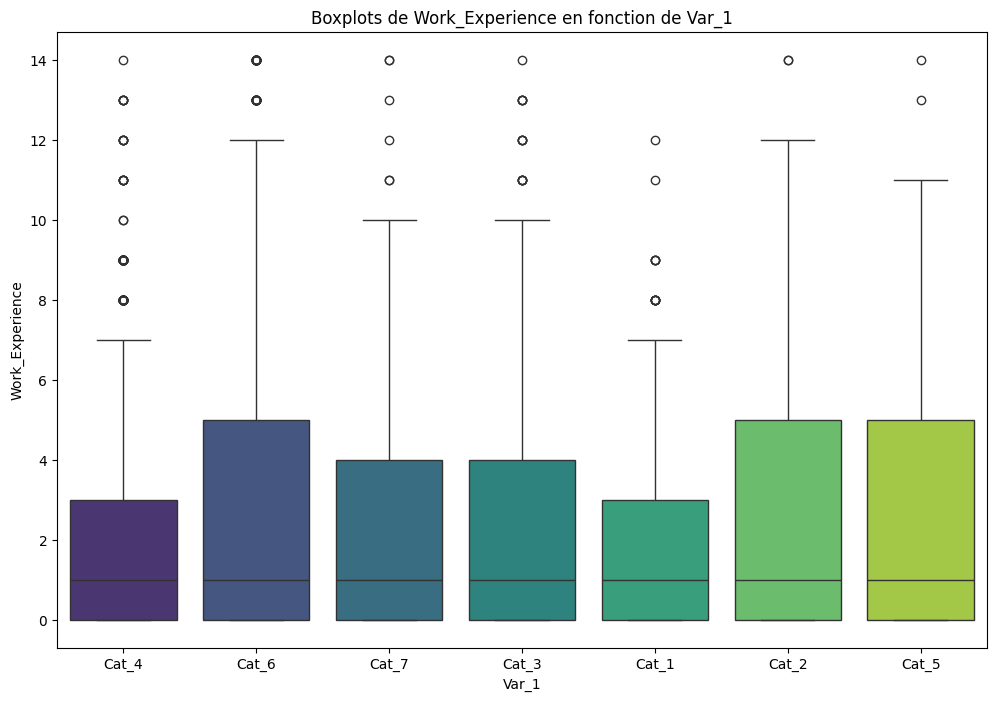

,count,mean,std,min,25%,50%,75%,max
Var_1,,,,,,,,
Cat_1,115.0,1.991304,2.951347,0.0,0.0,1.0,3.0,12.0
Cat_2,388.0,2.850515,3.249858,0.0,0.0,1.0,5.0,14.0
Cat_3,716.0,2.536313,3.253413,0.0,0.0,1.0,4.0,14.0
Cat_4,952.0,2.353992,3.165220,0.0,0.0,1.0,3.0,14.0
Cat_5,82.0,2.878049,3.563845,0.0,0.0,1.0,5.0,14.0
Cat_6,4739.0,2.709010,3.490194,0.0,0.0,1.0,5.0,14.0
Cat_7,180.0,2.705556,3.505299,0.0,0.0,1.0,4.0,14.0


In [12]:
plot_boxplots(train_data, 'Work_Experience')

- **Cat_1** et **Cat_4**: Présentent les moyennes les plus basses avec environ respectivement 2 et 2,3 ans d'expériences professionneles. 
- **Cat_6**, **Cat_2** et **Cat_5** : Présentent les moyennes les plus élevées parmi les autres segments (environ 2.85ans)
- **Cat_7** et **Cat_3** ont des moyennes plutôt modérées autour de 2,6ans.

C:\Users\HP\AppData\Local\Temp\ipykernel_6768\3590687936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Var_1', y=continuous_variable, data=df, palette='viridis')


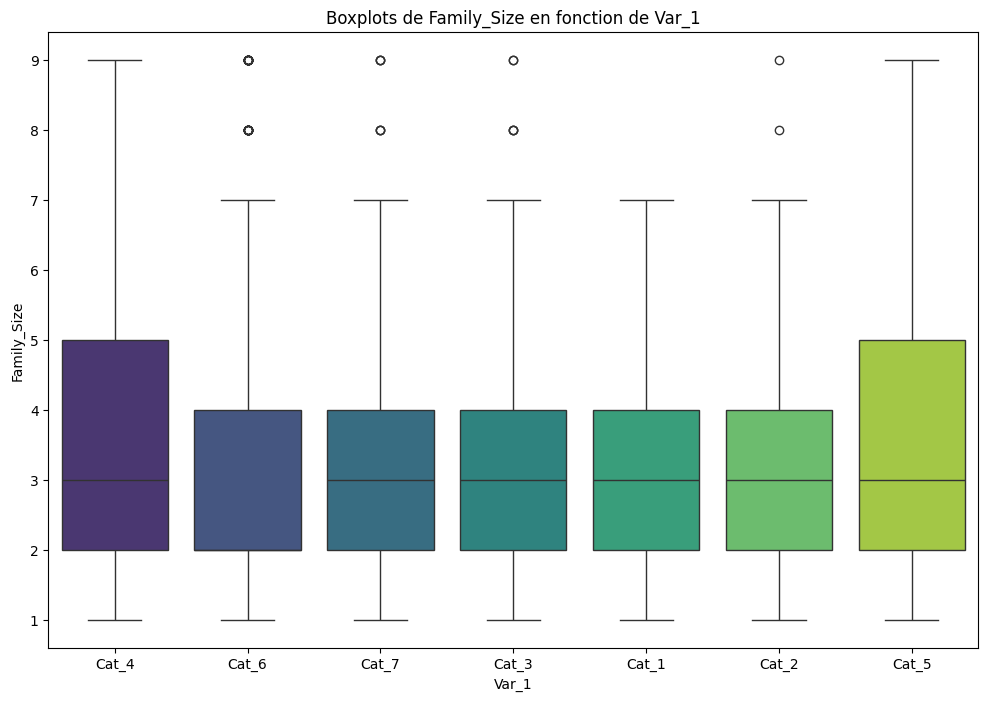

,count,mean,std,min,25%,50%,75%,max
Var_1,,,,,,,,
Cat_1,124.0,3.040323,1.433622,1.0,2.0,3.0,4.0,7.0
Cat_2,410.0,3.380488,1.556314,1.0,2.0,3.0,4.0,9.0
Cat_3,765.0,2.904575,1.490824,1.0,2.0,3.0,4.0,9.0
Cat_4,1035.0,3.504348,1.912175,1.0,2.0,3.0,5.0,9.0
Cat_5,79.0,3.594937,2.016083,1.0,2.0,3.0,5.0,9.0
Cat_6,5064.0,2.635071,1.369630,1.0,2.0,2.0,4.0,9.0
Cat_7,194.0,3.231959,1.781543,1.0,2.0,3.0,4.0,9.0


In [13]:
plot_boxplots(train_data, 'Family_Size')

- **Cat_5**: Cette catégorie présente la plus grande moyenne de la taille de la famille, avec environ 3.59.
- **Cat_4**: Suivant de près Cat_5, avec une moyenne d'environ 3.50
- **Cat_2**, **Cat_7** et **Cat_1** : Entre 3 et 3,4
- **Cat_3 et Cat_6**: Ces catégories présentent les moyennes les plus basses, avec environ 2.90 pour Cat_3 et 2.64 pour Cat_6.

## 2. Prétraitement des données

### Typage des données

In [14]:
dict_columns_format ={'ID': 'int64',
                   'Gender': 'category',
                   'Ever_Married': 'category',
                   'Age': 'int64',
                   'Graduated': 'category',
                   'Profession': 'category',
                   'Work_Experience': 'float',
                   'Spending_Score': 'category',
                   'Family_Size': 'float',
                   'Var_1': 'category'
                   }

train_data = train_data.astype(dict_columns_format)
test_data = test_data.astype(dict_columns_format)

### Etude des valeurs NULL

In [15]:
train_data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [16]:
train_data.describe(include=['category'])

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
count,8068,7928,7990,7944,8068,7992
unique,2,2,2,9,3,7
top,Male,Yes,Yes,Artist,Low,Cat_6
freq,4417,4643,4968,2516,4878,5238


In [17]:
train_data.shape, test_data.shape

((8068, 10), (2627, 10))

In [18]:
train_data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

Les variables "Ever_Married", "Graduated", "Profession", "Work_Experience", "Family_Size" et Vr_1 ont des données manquantes.

In [19]:
test_data.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

### Traitement des valeurs NULL - Imputation KNN

In [20]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

Encoding des variables catégorielles pour pourvoir utiliser le KNN Imputer

In [21]:
# Créez un label encoder distinct pour chaque colonne catégorielle
le_gender = LabelEncoder()
le_ever_married = LabelEncoder()
le_graduated = LabelEncoder()
le_profession = LabelEncoder()
le_spending_score = LabelEncoder()
le_var_1 = LabelEncoder()

# Appliquez les label encoders aux colonnes catégorielles

# Pour les données train
train_data['Gender'] = le_gender.fit_transform(train_data['Gender'])

train_data['Ever_Married'] = le_ever_married.fit_transform(train_data['Ever_Married'])
train_data['Ever_Married'] = np.where(train_data['Ever_Married'] == le_ever_married.transform([np.nan])[0], np.nan, train_data['Ever_Married']) # Garder les valeurs NULL et ne pas les prendre en compte comme une modalité


train_data['Graduated'] = le_graduated.fit_transform(train_data['Graduated'])
train_data['Graduated'] = np.where(train_data['Graduated'] == le_graduated.transform([np.nan])[0], np.nan, train_data['Graduated'])

train_data['Profession'] = le_profession.fit_transform(train_data['Profession'])
train_data['Spending_Score'] = le_spending_score.fit_transform(train_data['Spending_Score'])
train_data['Var_1'] = le_var_1.fit_transform(train_data['Var_1'])


# Pour les données test
test_data['Gender'] = le_gender.transform(test_data['Gender'])

test_data['Ever_Married'] = le_ever_married.transform(test_data['Ever_Married'])
test_data['Ever_Married'] = np.where(test_data['Ever_Married'] == le_ever_married.transform([np.nan])[0], np.nan, test_data['Ever_Married'])

test_data['Graduated'] = le_graduated.transform(test_data['Graduated'])
test_data['Graduated'] = np.where(test_data['Graduated'] == le_graduated.transform([np.nan])[0], np.nan, test_data['Graduated'])

test_data['Profession'] = le_profession.transform(test_data['Profession'])
test_data['Spending_Score'] = le_spending_score.transform(test_data['Spending_Score'])
test_data['Var_1'] = le_var_1.transform(test_data['Var_1'])

KNNImputer pour les données train

In [22]:
# Création d'un imputeur k-NN
imputer = KNNImputer(n_neighbors=5)

# Sélectionner toutes les colonnes pour l'imputation
features = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']

# Appliquer l'imputation aux données
imputed_values = imputer.fit_transform(train_data[features])

# Création d'un DataFrame temporaire avec les valeurs imputées
imputed_df = pd.DataFrame(imputed_values, columns=features)

# Remplacer les valeurs imputées dans le DataFrame d'origine
train_data[features] = imputed_df


# Récupérer les données sous leur forme orignelle
train_data['Gender'] = le_gender.inverse_transform(train_data['Gender'].astype(int))
train_data['Ever_Married'] = le_ever_married.inverse_transform(train_data['Ever_Married'].astype(int))
train_data['Profession'] = le_profession.inverse_transform(train_data['Profession'].astype(int))
train_data['Graduated'] = le_graduated.inverse_transform(train_data['Graduated'].astype(int))
train_data['Spending_Score'] = le_spending_score.inverse_transform(train_data['Spending_Score'].astype(int))
train_data['Var_1'] = le_var_1.inverse_transform(train_data['Var_1'].astype(int))

KNNImputer pour les données test

In [23]:
# Création d'un imputeur k-NN
imputer = KNNImputer(n_neighbors=5)

# Sélectionner toutes les colonnes pour l'imputation
features = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']

# Appliquer l'imputation aux données
imputed_values = imputer.fit_transform(test_data[features])

# Création d'un DataFrame temporaire avec les valeurs imputées
imputed_df = pd.DataFrame(imputed_values, columns=features)

# Remplacer les valeurs imputées dans le DataFrame d'origine
test_data[features] = imputed_df


# Récupérer les données sous leur forme orignelle
test_data['Gender'] = le_gender.inverse_transform(test_data['Gender'].astype(int))
test_data['Ever_Married'] = le_ever_married.inverse_transform(test_data['Ever_Married'].astype(int))
test_data['Profession'] = le_profession.inverse_transform(test_data['Profession'].astype(int))
test_data['Graduated'] = le_graduated.inverse_transform(test_data['Graduated'].astype(int))
test_data['Spending_Score'] = le_spending_score.inverse_transform(test_data['Spending_Score'].astype(int))
test_data['Var_1'] = le_var_1.inverse_transform(test_data['Var_1'].astype(int))

Toutes les données NULL ont été imputées sauf pour la variable *Profession* où la valeur NULL est peut-être une modalité à part entière représentant les individus sans-emplois.

In [24]:
train_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22.0,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38.0,Yes,Engineer,3.8,Average,3.0,Cat_4
2,466315,Female,Yes,67.0,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67.0,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40.0,Yes,Entertainment,4.8,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22.0,No,NaN,0.0,Low,7.0,Cat_1
8064,464685,Male,No,35.0,No,Executive,3.0,Low,4.0,Cat_4
8065,465406,Female,No,33.0,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,467299,Female,No,27.0,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [25]:
train_data.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               76
dtype: int64

In [26]:
test_data.isnull().sum()

ID                  0
Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession         38
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              32
dtype: int64

### Suppression des segments non renseignés

In [27]:
train_data = train_data[train_data.Var_1.isnull()==False]
test_data = test_data[test_data.Var_1.isnull()==False]

### Création des variables indicatrices

In [28]:
train_data_dummies = pd.get_dummies(train_data, columns=['Gender', 'Ever_Married', "Graduated", "Profession", "Spending_Score"], dummy_na=True)
test_data_dummies = pd.get_dummies(test_data, columns=['Gender', 'Ever_Married', "Graduated", "Profession", "Spending_Score"], dummy_na=True)

In [29]:
train_data_dummies

,ID,Age,Work_Experience,Family_Size,Var_1,Gender_Female,Gender_Male,Gender_nan,Ever_Married_No,Ever_Married_Yes,...,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_nan,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Spending_Score_nan
0,462809,22.0,1.0,4.0,Cat_4,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
1,462643,38.0,3.8,3.0,Cat_4,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,466315,67.0,1.0,1.0,Cat_6,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,461735,67.0,0.0,2.0,Cat_6,False,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
4,462669,40.0,4.8,6.0,Cat_6,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,22.0,0.0,7.0,Cat_1,False,True,False,True,False,...,False,False,False,False,False,True,False,False,True,False
8064,464685,35.0,3.0,4.0,Cat_4,False,True,False,True,False,...,True,False,False,False,False,False,False,False,True,False
8065,465406,33.0,1.0,1.0,Cat_6,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
8066,467299,27.0,1.0,4.0,Cat_6,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False


In [30]:
# Renommer la colonne "Profession_nan" en "Profession_Null"
train_data_dummies.rename(columns={"Profession_nan": "Profession_Null"})
test_data_dummies.rename(columns={"Profession_nan": "Profession_Null"})

# Supprimer les colonnes contenant 'nan' dans le nom des colonnes
columns_to_drop = [col for col in train_data_dummies.columns if 'nan' in col]
train_data_dummies = train_data_dummies.drop(columns=columns_to_drop)
test_data_dummies = test_data_dummies.drop(columns=columns_to_drop)

# Supprimer certaines colonnes (pour les variables binaires)
train_data_dummies = train_data_dummies.drop(columns=['Gender_Male', 'Ever_Married_No', 'Graduated_No'])
test_data_dummies = test_data_dummies.drop(columns=['Gender_Male', 'Ever_Married_No', 'Graduated_No'])

## 3. Etude des corrélations

## 4. Classification

In [31]:
#Suppression d la première colonne ID
train_data_dummies = train_data_dummies.iloc[:,1:]  
test_data_dummies = test_data_dummies.iloc[:,1:]

In [32]:
from sklearn.preprocessing import  LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

Définition des variables X_train, y_train, X_test et y_test

In [33]:
# Création d'un LabelEncoder pour la variable cible
le_target=LabelEncoder()

# Définir X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = train_data_dummies.drop(columns=['Var_1']), le_target.fit_transform(train_data_dummies.loc[:, ['Var_1']]), \
    test_data_dummies.drop(columns=['Var_1']), le_target.transform(test_data_dummies.loc[:, ['Var_1']])

c:\Users\HP\Documents\Projets\2-En cours\Sohyuce\sohyuce_segmentation_classifier\venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\Documents\Projets\2-En cours\Sohyuce\sohyuce_segmentation_classifier\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Définition d'une stratégie de sampling pour le sur-échantillonage des classes peu fréquentes

In [34]:
sampling_strategy = {0:1000, 1:1000, 2: 1000, 4: 1000, 6: 1000}
#sampling_strategy = {0:1000, 1:1000, 2: 1000, 3: 1089, 4: 1000, 5: 5238, 6: 1000}

Création du modèle et utilisation de class_weight='balanced' pour gérer les données non balancées

In [35]:
# Création de la pipeline avec un préprocessing SMOTE et un RandomForestClassifier
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=sampling_strategy, k_neighbors=5, random_state=42)),
    #('lasso_selector', SelectFromModel(LogisticRegression(penalty='l1', solver='saga',C=0.0001))),
    ('classifier', RandomForestClassifier(max_depth=15, n_estimators=50, class_weight='balanced', random_state=42))
])

Création d'une grid search pour optimiser les hyperparamètres et utilisation de la métrique F1_weighted pour gérer les déséquilibres de classes

In [36]:
# Définir la grille de paramètres pour la recherche sur grille
param_grid = {
    'classifier__max_depth': [10, 15, 20],
    'classifier__n_estimators': [30, 50, 100]
    #'lasso_selector__estimator__C': [0.01, 0.1,1,10]
}

# Effectuer une recherche sur grille avec validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='f1_weighted', verbose=3, error_score='raise')
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs paramètres et le meilleur modèle
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Meilleurs paramètres :", best_params)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV 1/4] END classifier__max_depth=10, classifier__n_estimators=30;, score=0.489 total time=   0.8s
[CV 2/4] END classifier__max_depth=10, classifier__n_estimators=30;, score=0.486 total time=   0.5s
[CV 3/4] END classifier__max_depth=10, classifier__n_estimators=30;, score=0.487 total time=   0.7s
[CV 4/4] END classifier__max_depth=10, classifier__n_estimators=30;, score=0.498 total time=   0.6s
[CV 1/4] END classifier__max_depth=10, classifier__n_estimators=50;, score=0.492 total time=   0.9s
[CV 2/4] END classifier__max_depth=10, classifier__n_estimators=50;, score=0.492 total time=   0.7s
[CV 3/4] END classifier__max_depth=10, classifier__n_estimators=50;, score=0.486 total time=   0.9s
[CV 4/4] END classifier__max_depth=10, classifier__n_estimators=50;, score=0.506 total time=   0.9s
[CV 1/4] END classifier__max_depth=10, classifier__n_estimators=100;, score=0.493 total time=   1.6s
[CV 2/4] END classifier__max_depth=10, 

In [37]:
# X_train_resampled, y_train_resampled = pipeline.named_steps['smote'].fit_resample(X_train, y_train)

Prédictions du modèle

In [38]:
y_pred = best_model.predict(X_test)
y_pred

array([2, 5, 3, ..., 5, 3, 1])

Matrice de confusion

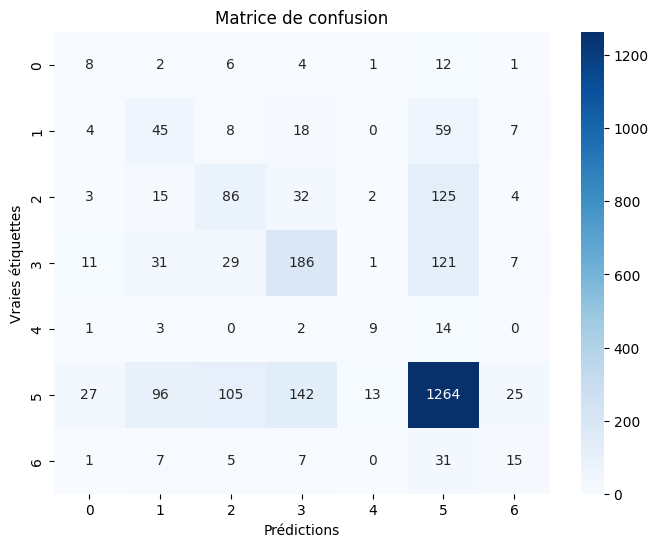

In [39]:
# Affichez la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichez la matrice de confusion sous forme de heatmap avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

## 5. Analyse des facteurs contributifs

Analyse des facteurs avec Shapley

In [40]:
import shap

# Créer un explainer SHAP pour le meilleur modèle
explainer = shap.TreeExplainer(best_model.named_steps['classifier'])

# Obtenir les valeurs SHAP pour l'ensemble de test
shap_values = explainer.shap_values(X_test)

# Tracer le graphique récapitulatif pour chaque classe
#shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, class_names=best_model.classes_, plot_type="bar")


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Récupérer les shap values, les aggréger ...

In [41]:
# Créer un DataFrame pour stocker les valeurs SHAP de chaque classe
shap_df_list = [pd.DataFrame(values, columns=X_test.columns) for values in shap_values]

# Créer un DataFrame pour stocker l'impact (moyenne) de chaque variable avec son signe pour chaque classe
impact_df = pd.DataFrame(index=X_test.columns)

# Boucler sur chaque classe
for class_index, shap_df in enumerate(shap_df_list):
    # Boucler sur chaque variable
    for variable in X_test.columns:
        # Calculer l'impact moyen de la variable avec son signe
        variable_impact = shap_df[variable].mean()
        impact_df.loc[variable, f'Class_{class_index}_Impact'] = variable_impact

...  et les visualiser

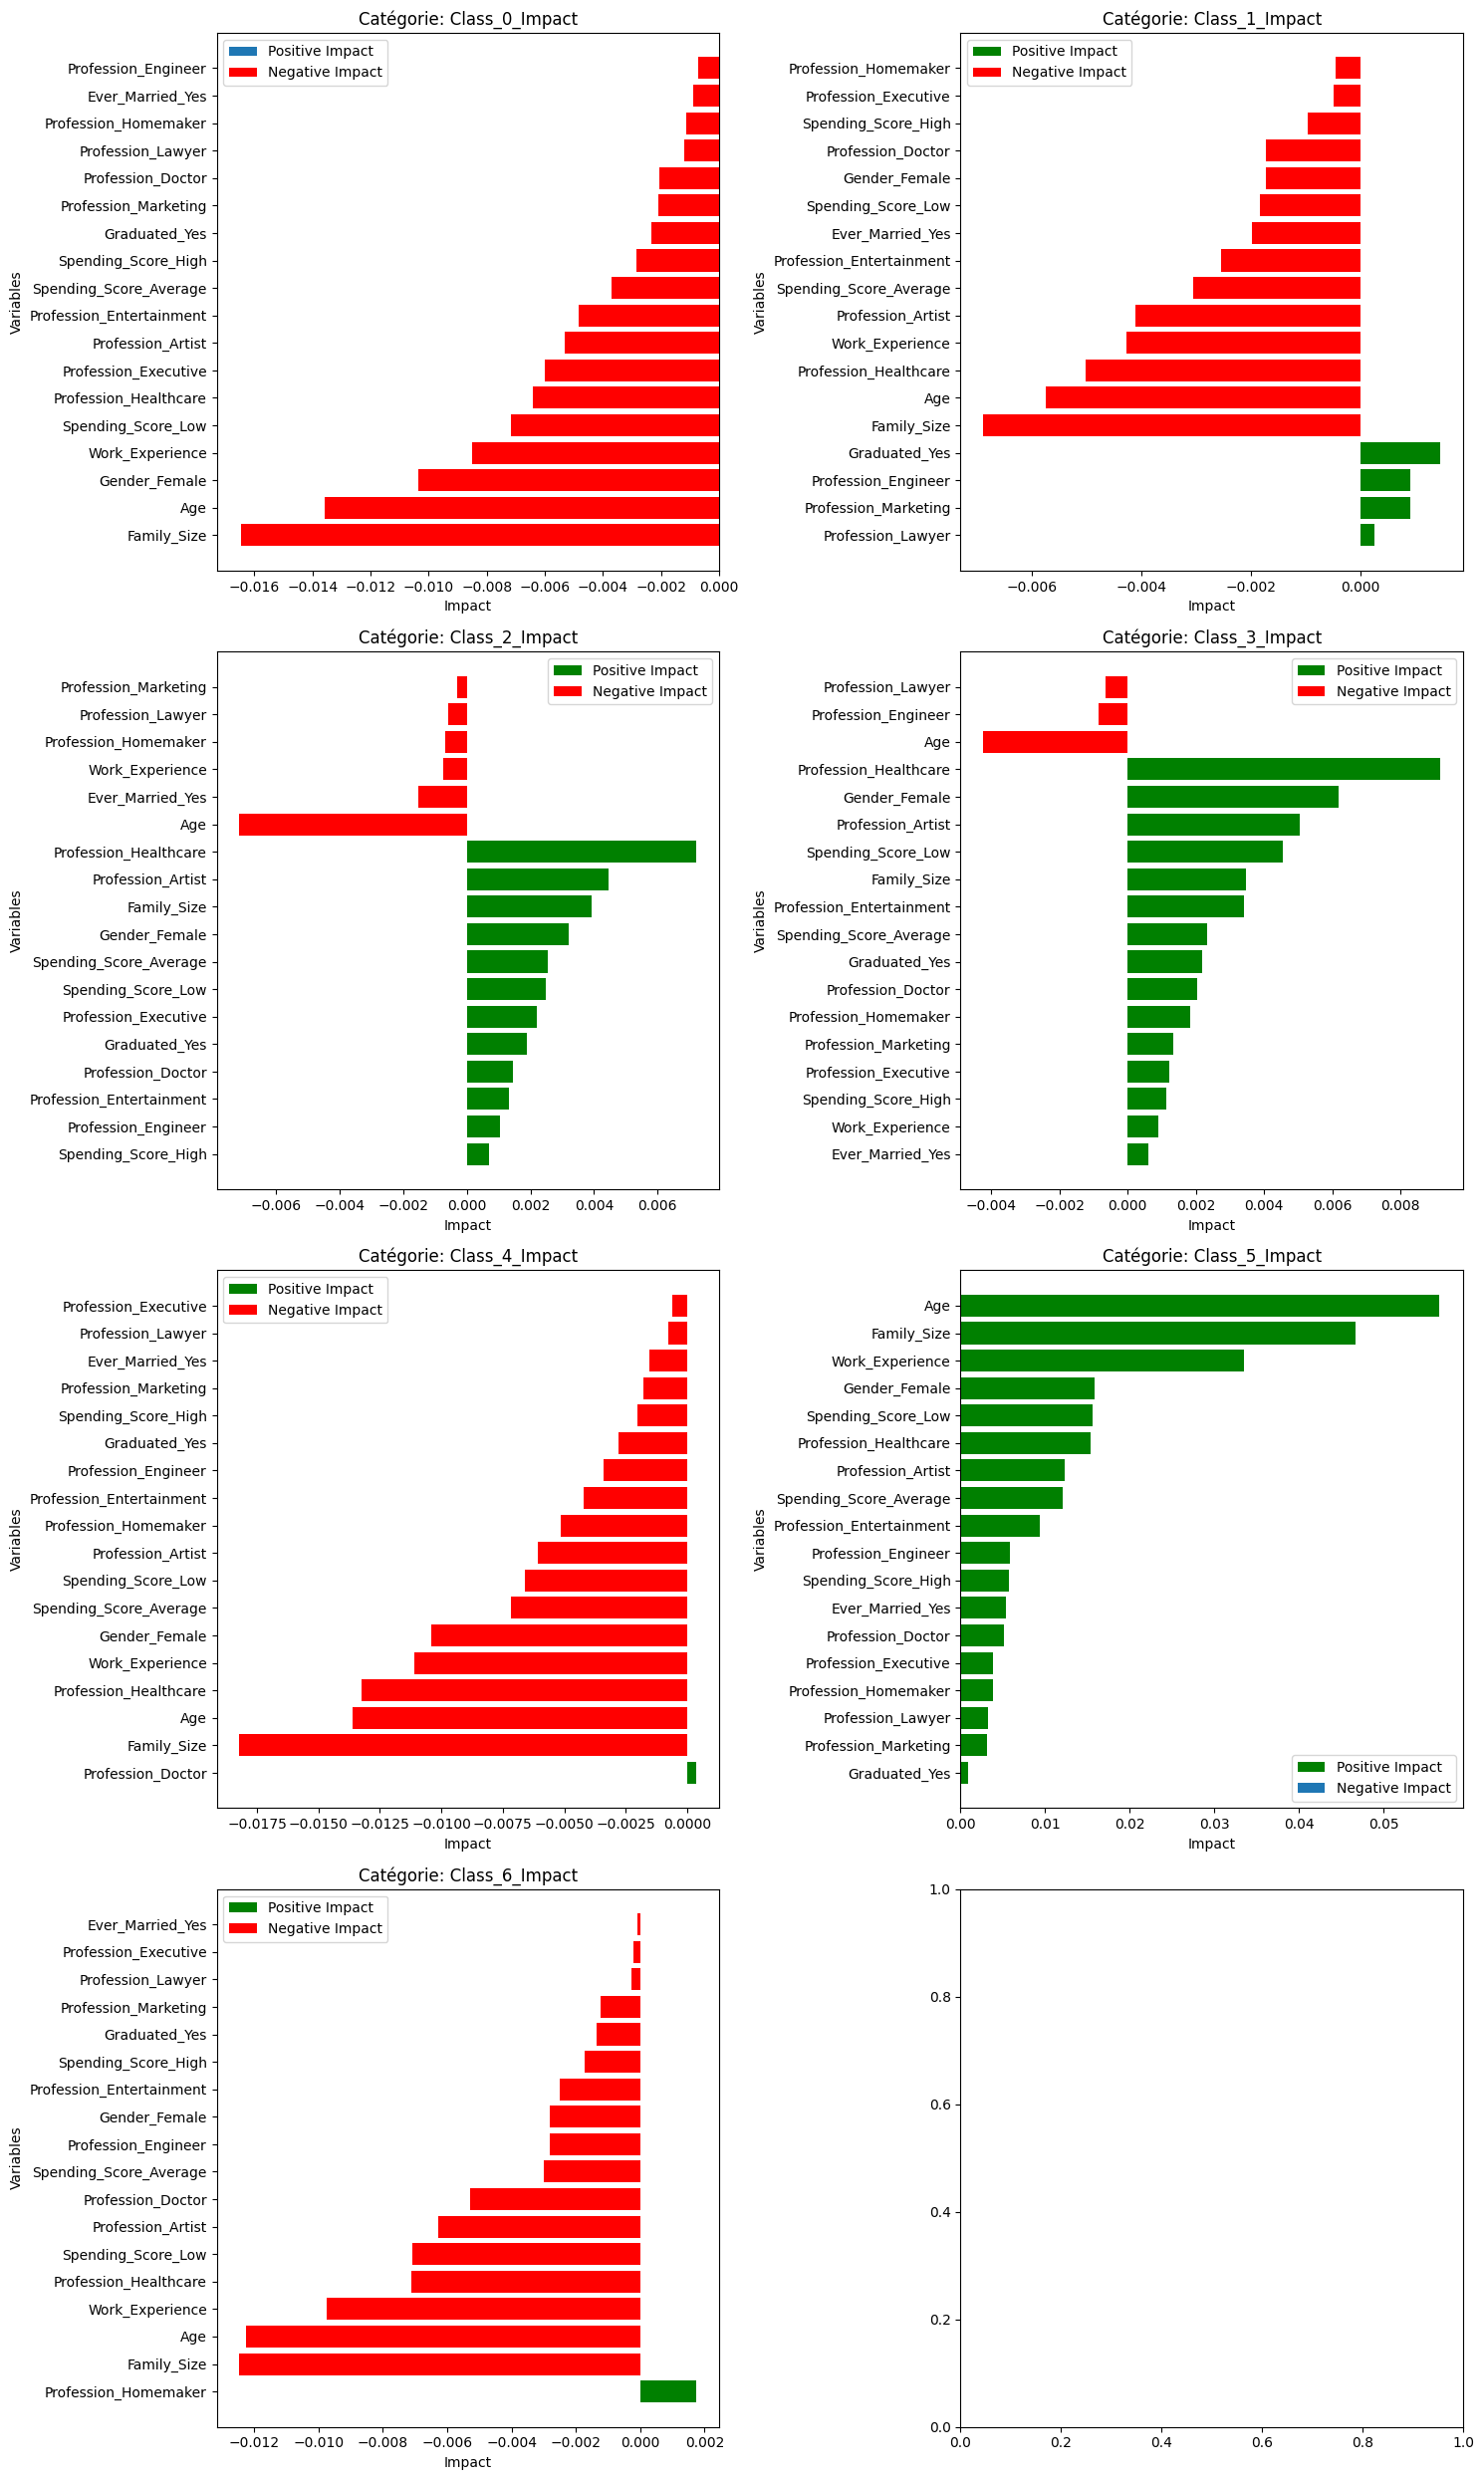

In [42]:
# Créer une grille de sous-graphiques
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))

# Appliquer une flatmap pour itérer sur les sous-graphiques
axes = axes.flatten()

# Iterer sur les catégories (âges)
for i, category_label in enumerate(impact_df.columns):
    ax = axes[i]

    # Extraire les impacts pour chaque variable
    impacts = impact_df[category_label]

    # Trier les impacts par valeur
    impacts_sorted = impacts.sort_values()

    # Séparer les impacts positifs et négatifs
    positive_impacts = impacts_sorted[impacts_sorted > 0]
    negative_impacts = impacts_sorted[impacts_sorted <= 0]

    # Créer le graphique à barres horizontales avec des couleurs différentes pour les impacts positifs et négatifs
    ax.barh(positive_impacts.index, impacts[positive_impacts.index], color='green', label='Positive Impact')
    ax.barh(negative_impacts.index, impacts[negative_impacts.index], color='red', label='Negative Impact')

    # Ajouter des étiquettes et un titre pour chaque sous-graphique
    ax.set_xlabel('Impact')
    ax.set_ylabel('Variables')
    ax.set_title(f'Catégorie: {category_label}')
    ax.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


## 6. Analyse des résultats

| Persona                      | Âge                     | Situation Familiale     | Profession              | Dépenses                | Sexe           |
| ---------------------------- | ----------------------- | ----------------------- | ----------------------- | ----------------------- | ---------------|
| 0                            | Jeune                   | Pas de famille          | Pas de profession       | Dépense moyenne à élevée| Hommes         |
| 1                            | Jeune                   | Pas de famille          | Supérieure              | Dépenses moyennes       |                |
| 2                            | Jeune                   | Jeune famille           | Healthcare              | Dépensent peu           | Femmes         |
| 3                            | Moyennement Jeune       | Jeune famille           | Artistes                | Dépensent peu  | Femmes         |
| 4                            | Moyennement Jeune       | Pas de famille          | Healthcare              | Moyennes                | Femmes         |
| 5                            | Un peu âgé              | Famille                 | Grande expérience        | Faibles à Modérées     | H +F         |
| 6                            | Jeune                   | Pas de famille          | Homemaker                | Moyennes                | Hommes et Femmes |


# Synthèse du projet

## Contexte
Dans le cadre de l'analyse des données de segmentation client, l'objectif était de déterminer la catégorie (Var_1) pour chaque client en utilisant un ensemble restreint de variables explicatives. La problématique étant orientée marketing, l'accent a été mis sur la livraison de résultats explicatifs et facilement interprétables par les équipes métier.

## Méthodologie
1. **Exploration des données :** Les données ont été chargées et inspectées, identifiant des variables telles que le genre, le statut matrimonial, le niveau d'éducation, la profession, etc.

2. **Prétraitement des données :** Un ensemble de prétraitements a été appliqué aux données, incluant le remplacement des valeurs manquantes avec l'imputation k-NN et la gestion des variables catégorielles avec des labelEncoder. La technique SMOTE a été utilisée pour traiter les données déséquilibrées.

3. **Choix du modèle :** Initialement, un arbre de décision simple a été envisagé, mais en raison du faible lien entre les variables et la variable cible, une forêt aléatoire a été choisie pour améliorer la précision tout en maintenant l'interprétabilité.

4. **Optimisation du modèle :** Une recherche sur grille avec validation croisée a été utilisée pour optimiser les hyperparamètres de la forêt aléatoire, en mettant l'accent sur la métrique de F1-pondérée.

5. **Évaluation du modèle :** Le modèle final a été évalué à l'aide de la matrice de confusion, montrant de bons résultats dans la prédiction des différentes catégories.

6. **Interprétation des résultats :** La méthode Shapley a été utilisée pour interpréter les prédictions du modèle, permettant de comprendre l'impact de chaque variable sur les prédictions pour chaque catégorie.

## Résultats et Conclusions
- Le modèle optimisé a démontré de bonnes performances sur l'ensemble de test malgré la nature déséquilibrée des données.
- L'utilisation de Shapley a permis d'interpréter les résultats du modèle en identifiant les variables qui ont le plus d'impact sur chaque catégorie.
- L'interprétation des segments reste assez difficile du fait du peu de variables à disposition. 

Cette approche a permis de développer un modèle prédictif robuste tout en fournissant des informations explicites sur les variables qui influencent la segmentation client. Ces résultats peuvent être utilisés pour guider les décisions marketing de manière plus informée.